In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
cococola= pd.read_excel("C:\\Users\\Factory\\Desktop\\Forecasting\\CocaCola_Sales_Rawdata.xlsx")

In [5]:
cococola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [6]:
quarter=['Q1','Q2','Q3','Q4']
n=cococola['Quarter'][0]
n[0:2]
cococola['quarter']=0

In [7]:
for i in range(42):
    n=cococola['Quarter'][i]
    cococola['quarter'][i]=n[0:2]

<ipython-input-7-19ccb7355995>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cococola['quarter'][i]=n[0:2]
C:\Users\Factory\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
dummy=pd.DataFrame(pd.get_dummies(cococola['quarter']))
data1=pd.concat((cococola,dummy),axis=1)

In [9]:
data1.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [10]:
t= np.arange(1,43)
data1['t']=t
data1['t_square']=data1['t']*data1['t']

In [11]:
log_Sales=np.log(data1['Sales'])
data1['log_Sales']=log_Sales

In [12]:
data1.head(10)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [13]:
data1.to_excel('PREDICT_CC_DATA.xlsx')

<AxesSubplot:>

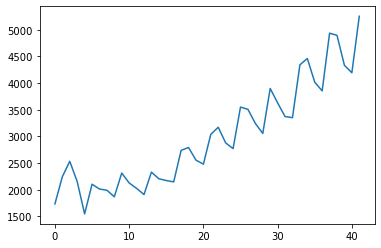

In [14]:
data1.Sales.plot()

In [15]:
Train=data1.head(38)
Test=data1.tail(4)

In [16]:
import statsmodels.formula.api as smf

In [17]:
linear= smf.ols('Sales~t',data=Train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(Test['t'])))
rmselin=np.sqrt((np.mean(np.array(Test['Sales'])-np.array(predlin))**2))
rmselin

421.17878760022813

In [18]:
quad=smf.ols('Sales~t+t_square',data=Train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(Test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predquad))**2))
rmsequad

475.56183518315095

In [19]:
expo=smf.ols('log_Sales~t',data=Train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(Test['t'])))
rmseexpo=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

466.24797310672346

In [20]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=Train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(Test[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predadd))**2))
rmseadd

1860.0238154547283

In [21]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(Test[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

464.98290239822427

In [22]:
addquad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(Test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

301.73800719352977

In [23]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=Train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(Test[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1963.3896400779709

In [24]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(Test[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

225.5243904982721

In [25]:
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(Test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

581.8457187971785

In [26]:
Table={'Model':pd.Series(['rmselin','rmsequad','rmseexpo','rmseadd','rmseaddlinear','rmseaddquad','rmsemul','rmsemulin','rmse_mul_quad']),'Values':pd.Series([rmselin,rmsequad,rmseexpo,rmseadd,rmseaddlinear,rmseaddquad,rmsemul,rmsemulin,rmse_mul_quad])}
RMSE_Table=pd.DataFrame(Table)
RMSE_Table

,Model,Values
0,rmselin,421.178788
1,rmsequad,475.561835
2,rmseexpo,466.247973
3,rmseadd,1860.023815
4,rmseaddlinear,464.982902
5,rmseaddquad,301.738007
6,rmsemul,1963.389640
7,rmsemulin,225.524390
8,rmse_mul_quad,581.845719


In [28]:
pred=pd.read_excel('PREDICT_CC_DATA.xlsx')

In [29]:
final_pred= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=data1).fit()

In [30]:
pred_new = pd.Series(mullin.predict(pred))
pred_new

pred["forecasted_Sales"] = np.exp(pd.Series(pred_new))

pred

,Unnamed: 0,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales,forecasted_Sales
0,0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663,1549.709886
1,1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443,1974.131516
2,2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477,1947.457062
3,3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529,1805.980615
4,4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602,1703.152319
5,5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791,2169.597484
6,6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058,2140.281894
7,7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767,1984.797349
8,8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186,1871.787647
9,9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574,2384.417251
